<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.808911,20.618954,121.427864,117.509244,3.918620
1,0.0,1.0,28.181895,0.650909,38.832804,22.909358,15.923446
2,0.0,2.0,40.415761,-13.071428,37.344334,41.388961,-4.044628
3,0.0,3.0,61.155181,-3.669839,67.485342,72.716442,-5.231101
4,0.0,4.0,29.694114,-36.189470,3.504644,25.193608,-21.688964
...,...,...,...,...,...,...,...
29995,999.0,25.0,90.461842,-15.457024,85.004818,111.731576,-26.726758
29996,999.0,26.0,28.899136,-7.957462,30.941674,38.087892,-7.146219
29997,999.0,27.0,39.513937,-15.000867,34.513071,50.785727,-16.272657
29998,999.0,28.0,30.674667,7.207741,47.882408,40.211851,7.670557


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    90.808911  20.618954  121.427864  117.509244   3.918620
      1.0    28.181895   0.650909   38.832804   22.909358  15.923446
      2.0    40.415761 -13.071428   37.344334   41.388961  -4.044628
      3.0    61.155181  -3.669839   67.485342   72.716442  -5.231101
      4.0    29.694114 -36.189470    3.504644   25.193608 -21.688964
...                ...        ...         ...         ...        ...
999.0 25.0   90.461842 -15.457024   85.004818  111.731576 -26.726758
      26.0   28.899136  -7.957462   30.941674   38.087892  -7.146219
      27.0   39.513937 -15.000867   34.513071   50.785727 -16.272657
      28.0   30.674667   7.207741   47.882408   40.211851   7.670557
      29.0   95.405092 -54.064742   51.340350  117.644882 -66.304532

[30000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    90.808911  20.618954  121.427864  117.509244   3.918620
      1.0    28.181895   0.650909   38.832804   22.909358  15.923446
      2.0    40.415761 -13.071428   37.344334   41.388961  -4.044628
      3.0    61.155181  -3.669839   67.485342   72.716442  -5.231101
      4.0    29.694114 -36.189470    3.504644   25.193608 -21.688964
...                ...        ...         ...         ...        ...
999.0 25.0   90.461842 -15.457024   85.004818  111.731576 -26.726758
      26.0   28.899136  -7.957462   30.941674   38.087892  -7.146219
      27.0   39.513937 -15.000867   34.513071   50.785727 -16.272657
      28.0   30.674667   7.207741   47.882408   40.211851   7.670557
      29.0   95.405092 -54.064742   51.340350  117.644882 -66.304532

[30000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.808911,20.618954,121.427864,117.509244,3.918620
1,0.0,1.0,28.181895,0.650909,38.832804,22.909358,15.923446
2,0.0,2.0,40.415761,-13.071428,37.344334,41.388961,-4.044628
3,0.0,3.0,61.155181,-3.669839,67.485342,72.716442,-5.231101
4,0.0,4.0,29.694114,-36.189470,3.504644,25.193608,-21.688964
...,...,...,...,...,...,...,...
29995,999.0,25.0,90.461842,-15.457024,85.004818,111.731576,-26.726758
29996,999.0,26.0,28.899136,-7.957462,30.941674,38.087892,-7.146219
29997,999.0,27.0,39.513937,-15.000867,34.513071,50.785727,-16.272657
29998,999.0,28.0,30.674667,7.207741,47.882408,40.211851,7.670557


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    90.808911  20.618954  121.427864  117.509244   3.918620
      1.0    28.181895   0.650909   38.832804   22.909358  15.923446
      2.0    40.415761 -13.071428   37.344334   41.388961  -4.044628
      3.0    61.155181  -3.669839   67.485342   72.716442  -5.231101
      4.0    29.694114 -36.189470    3.504644   25.193608 -21.688964
...                ...        ...         ...         ...        ...
999.0 25.0   90.461842 -15.457024   85.004818  111.731576 -26.726758
      26.0   28.899136  -7.957462   30.941674   38.087892  -7.146219
      27.0   39.513937 -15.000867   34.513071   50.785727 -16.272657
      28.0   30.674667   7.207741   47.882408   40.211851   7.670557
      29.0   95.405092 -54.064742   51.340350  117.644882 -66.304532

[30000 rows x 5 columns]

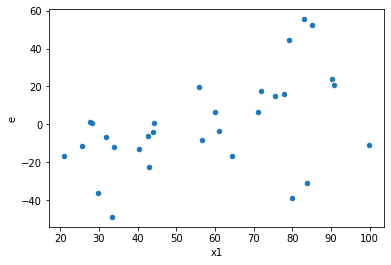

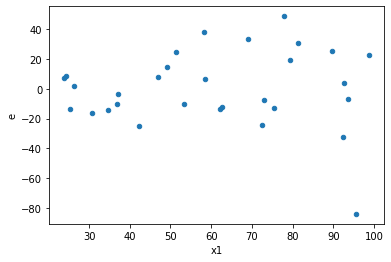

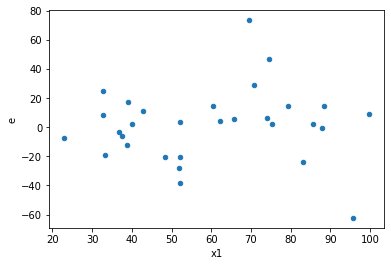

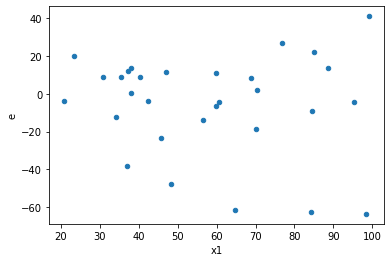

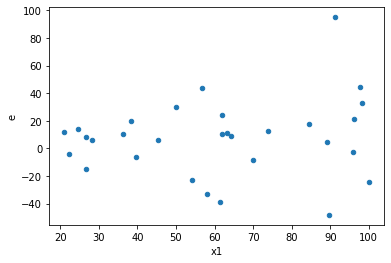

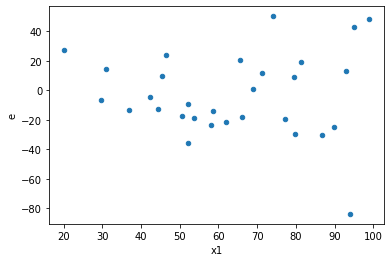

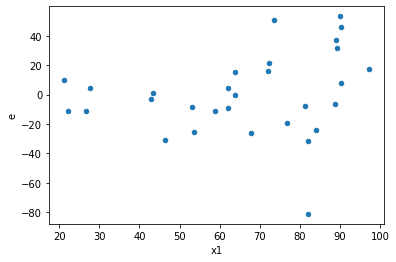

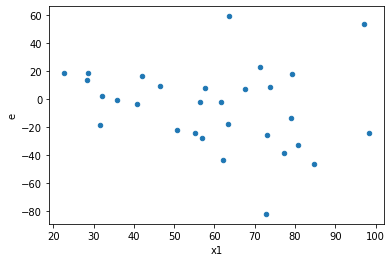

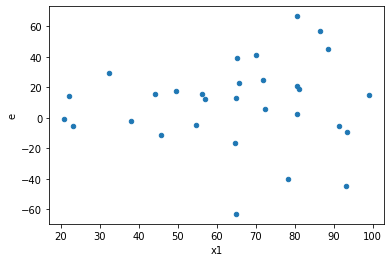

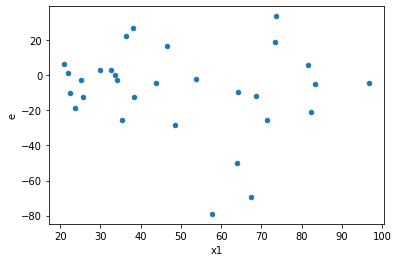

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,14.0,14.0,3238.7401969397138,15054.645563566972,231.33858549569385,1075.3318259690693,4.648302935132651,0.006872934007207343,0.9965635329963963,0.0034364670036036715,Reject001=0 : Heteroscedasticity
10.0,12.0,16.0,5127.8682027718505,19709.603786943255,427.3223502309875,1231.8502366839534,2.882718949800031,0.050459907562957484,0.9747700462185213,0.025229953781478742,Reject001=1 : Homoscedasticity
11.0,14.0,14.0,3961.3876697661317,21235.722054953112,282.95626212615224,1516.837289639508,5.360677576957977,0.0033737164840441647,0.9983131417579779,0.0016868582420220823,Reject001=0 : Heteroscedasticity
13.0,11.0,17.0,3049.524533945295,19616.749620667146,277.2295030859359,1153.926448274538,4.16235081558705,0.00868433204152086,0.9956578339792396,0.00434216602076043,Reject001=0 : Heteroscedasticity
15.0,11.0,17.0,1500.1761201654076,15909.914442558695,136.37964728776433,935.8773201505114,6.8622946221278,0.0004981998755317907,0.9997509000622341,0.00024909993776589534,Reject001=0 : Heteroscedasticity
16.0,13.0,15.0,8009.241900646169,12453.230494074556,616.095530818936,830.2153662716371,1.347543237601619,0.5750938503633845,0.7124530748183078,0.2875469251816922,Reject001=1 : Homoscedasticity
17.0,16.0,12.0,4145.321360479226,10285.98115280564,259.08258502995164,857.1650960671367,3.30846280527903,0.0415519936005011,0.9792240031997494,0.02077599680025055,Reject001=1 : Homoscedasticity
18.0,18.0,10.0,5217.8954339800175,5828.488445128795,289.8830796655565,582.8488445128795,2.010634236345643,0.2598820774100865,0.8700589612949567,0.12994103870504325,Reject001=1 : Homoscedasticity
20.0,15.0,13.0,1533.6423222356484,12518.564916317555,102.24282148237656,962.9665320244274,9.418426820218498,0.00022622965004703843,0.9998868851749765,0.00011311482502351922,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,14.0,10617.354870547584,3202.1670442976933,758.3824907533989,228.72621744983525,0.3015974396015025,0.03212389485737119,Reject001=1 : Homoscedasticity
1.0,14.0,14.0,3238.7401969397138,15054.645563566972,231.33858549569385,1075.3318259690693,4.648302935132651,0.006872934007207343,Reject001=0 : Heteroscedasticity
2.0,14.0,14.0,9805.62705209564,3374.541135284,700.4019322925458,241.03865252028572,0.3441433288616457,0.05518622502097104,Reject001=1 : Homoscedasticity
3.0,14.0,14.0,14755.514934070325,4634.536008906298,1053.9653524335947,331.0382863504498,0.31408839539752037,0.03808737920443879,Reject001=1 : Homoscedasticity
4.0,10.0,18.0,13858.338526624466,7696.784201746771,1385.8338526624466,427.59912231926506,0.3085500628360081,0.06202280875209277,Reject001=1 : Homoscedasticity
5.0,14.0,14.0,18010.960563418445,2533.366199651928,1286.4971831013174,180.9547285465663,0.14065691781022369,0.000752713484124746,Reject001=0 : Heteroscedasticity
6.0,20.0,8.0,19429.56781520258,1012.5488132569203,971.478390760129,126.56860165711504,0.130284525997621,0.0002151866414403039,Reject001=0 : Heteroscedasticity
7.0,19.0,9.0,21762.537422149013,1544.8131962519888,1145.3967064288954,171.64591069466542,0.14985717152079217,0.0005268880182749746,Reject001=0 : Heteroscedasticity
8.0,18.0,10.0,21209.34202134251,1598.3136113528467,1178.2967789634727,159.83136113528468,0.13564609866445157,0.00028457140624547504,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      702
Reject001=0 : Heteroscedasticity    298
Name: Result_test, dtype: int64